In [16]:
import sympy
import numpy as np
from sympy import *
from Parameters import *
import matplotlib.pyplot as plt
import scipy.optimize
from scipy.optimize import fsolve
import math

from Calc import open_model, save
from Parameters import *
from Geometry import *
from Calc import open_model, save
import matplotlib.pyplot as plt

[1.77741276334102, 1.78049700192560, 1.78360268030779, 1.78673002219931, 1.78987925443407, 1.79305060702281, 1.79624431320884, 1.79946060952507, 1.80269973585212, 1.80596193547779, 1.80924745515766, 1.81255654517714, 1.81588945941476, 1.81924645540683, 1.82262779441354, 1.82603374148647, 1.82946456553761, 1.83292053940980, 1.83640193994885, 1.83990904807714, 1.84344214886892, 1.84700153162723, 1.85058748996258, 1.85420032187339, 1.85784032982820, 1.86150782084974, 1.86520310660099, 1.86892650347306, 1.87267833267516, 1.87645892032664, 1.88026859755112, 1.88410770057274, 1.88797657081475, 1.89187555500033, 1.89580500525573, 1.89976527921592, 1.90375674013263, 1.90777975698503, 1.91183470459293, 1.91592196373281, 1.92004192125649, 1.92419497021274, 1.92838150997180, 1.93260194635283, 1.93685669175463, 1.94114616528937, 1.94547079291970, 1.94983100759918, 1.95422724941624, 1.95865996574160, 1.96312961137950, 1.96763664872258, 1.97218154791072, 1.97676478699390, 1.98138685209909, 1.9860482

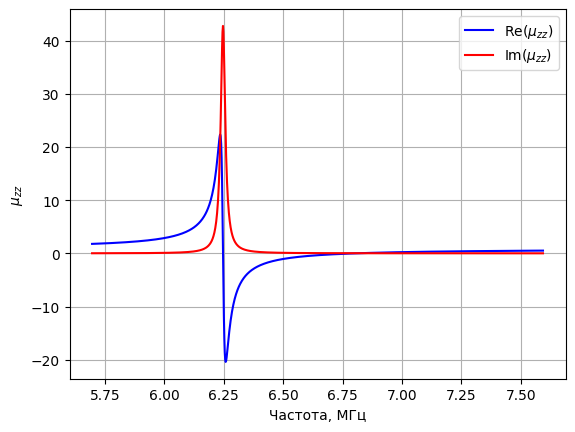

In [17]:
R, L, C, r, m, S, n, x, y = symbols('R, L, C, r, m, S, n, x, y', real = True)

Omega =  np.linspace(omega_0*0.9, omega_0*1.2, 1000)

A = L/(m*r) - 1/(x**2*m*r*C)
B = 1j*R/(x*m*r)

#вещественная часть магнитной проницаемости mu_zz
Re_mu = (A**2 + 2*S*A - (1/3)*(np.pi**2*r**3*n)*A - B**2 + S**2 - (1/3)*(np.pi**2*r**3*n)*S - (2/9)*(np.pi**2*r**3*n)**2)/((A + S + (1/3)*(np.pi**2*r**3*n))**2 - B**2)

#мнимая часть магнитной проницаемости mu_zz
Im_mu = ((np.pi**2*r**3*n)*(R/(x*m*r)))/((A + S + (1/3)*(np.pi**2*r**3*n))**2 - B**2)

Re_mu_subs = []
Im_mu_subs=[]
freq = []
for k in range (0, len(Omega)):
    element_Re = Re_mu.subs({R: Params['R'], L: Params['L'], C: Params['C'], r: Params['Radius'], m: Params['mu_0'], S: Params['Sigma'], n: 1/(Params['Dz'])**3, x: Omega[k]})
    Re_mu_subs.append(element_Re)
    freq.append(Omega[k]/2/np.pi/10**6)
    element_Im = Im_mu.subs({R: Params['R'], L: Params['L'], C: Params['C'], r: Params['Radius'], m: Params['mu_0'], S: Params['Sigma'], n: 1/(Params['Dz'])**3, x: Omega[k]})
    Im_mu_subs.append(element_Im)


print(Re_mu_subs)
print(freq)

plt.plot(freq, Re_mu_subs, color = 'blue', label = 'Re($\mu_{zz}$)')
plt.plot(freq, Im_mu_subs, color = 'red', label = 'Im($\mu_{zz}$)')
plt.xlabel('Частота, МГц')
plt.ylabel('$\mu_{zz}$')
plt.legend()
plt.grid(True)

In [18]:
a = (R**2*C)/(m*r)
b = a + (np.pi**2*r**3*n)/(1-y)
c = (2/3)*(np.pi**2*r**3*n) + 2*S
d = (2*L)/(m*r)
e = sqrt(b**2 - 2*a*(d + c))
g = m*r*C

omega_of_mu_1 = (sqrt(2))/(sqrt(-g*b + g*d + g*c + g*e)) #для первого промежутка на графике (до резонанса + резонанс)
omega_of_mu_2 = (sqrt(2))/(sqrt(-g*b + g*d + g*c - g*e)) #для второго промежутка на графике (после резонанса)

omega_subs = omega_of_mu_2.subs({R: Params['R'], L: Params['L'], C: Params['C'], r: Params['Radius'], m: Params['mu_0'], S: Params['Sigma'], n: 1/(Params['Dz'])**3})
omega_func = lambdify(y, omega_subs, "math")

#mu = float(input("Введите значение магнитной проницаемости: "))
mu_value_1 = 0
value_omega = omega_func(mu_value_1)/2/np.pi/10**6

print("Значение частоты при магнитной проницаемости", mu_value_1, "равно", value_omega, "МГц")

Значение частоты при магнитной проницаемости 0 равно 6.805990537055071 МГц


In [19]:
h = (2*L)/(m*r) + (2/3)*np.pi**2*r**3*n + 2*S - (np.pi**2*r**3*n)/(1-y)
#l = S**2 + (1/9)*(np.pi**2*r**3*n)**2 + (2/3)*S*np.pi**2*r**3*n - ((1/3)*(np.pi**2*r**3*n)**2 + np.pi**2*r**3*n*S)/(1-y)
s = x**2*m*r

c_1 = 2/(s*(h + sqrt(((np.pi**2*r**3*n)/(1-y))**2 - ((2*R)/(x*m*r))**2))) #значения для промежутка частот до резонанса
c_2 = 2/(s*(h - sqrt(((np.pi**2*r**3*n)/(1-y))**2 - ((2*R)/(x*m*r))**2))) #после резонанса

C_subs = c_1.subs({R: Params['R'], L: Params['L'], r: Params['Radius'], m: Params['mu_0'], S: Params['Sigma'], n: 1/(Params['Dz'])**3, x: value_omega*2*np.pi*10**6})

C_func = lambdify(y, C_subs, 'math')

#mu_value_2 = float(input("Введите значение магнитной проницаемости: "))
mu_value_2 = 0
C_value = C_func(mu_value_2)

N = 12

step_for_grad = abs(Params['C'] - C_value)/N

step_for_half_grad = abs(Params['C'] - C_value)/(2*N)

step_for_2xgrad = step_for_grad*2


print('Шаг градиента:', step_for_grad)
print('Шаг градиента меньшего в 2 раза:', step_for_half_grad)
print('Шаг для градиента x2', step_for_2xgrad)


print(C_value)

Шаг градиента: 6.174901206487431e-10
Шаг градиента меньшего в 2 раза: 3.0874506032437155e-10
Шаг для градиента x2 1.2349802412974862e-09
3.959011855221509e-08


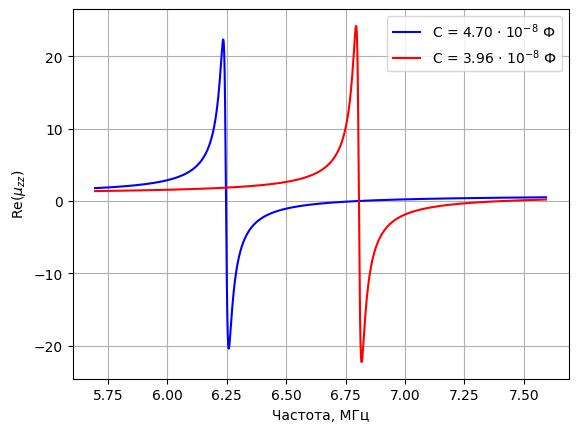

In [20]:
Re_mu_subs_2 = []
for k in range (0, len(Omega)):
    element_Re = Re_mu.subs({R: Params['R'], L: Params['L'], C: C_value, r: Params['Radius'], m: Params['mu_0'], S: Params['Sigma'], n: 1/(Params['Dz'])**3, x: Omega[k]})
    Re_mu_subs_2.append(element_Re)
    

plt.plot(freq, Re_mu_subs, color = 'blue', label = 'C = 4.70 $\cdot$ 10$^{-8}$ Ф')
plt.plot(freq, Re_mu_subs_2, color = 'red', label = 'C = 3.96 $\cdot$ 10$^{-8}$ Ф')
plt.xlabel('Частота, МГц')
plt.ylabel('Re($\mu_{zz}$)')
plt.legend() 
plt.grid(True)

In [9]:
#проверка
Re_mu_subs_new = Re_mu.subs({R: Params['R'], L: Params['L'], C: Params['C'], r: Params['Radius'], m: Params['mu_0'], S: Params['Sigma'], n: 1/(Params['Dz'])**3})
Re_mu_func = lambdify(x, Re_mu_subs_new, "math")
Mu_from_omega = Re_mu_func(value_omega*2*np.pi*10**6)
print(Mu_from_omega)

3.596627298096903e-15


In [21]:
Omega =  np.linspace(omega_0*0.9, omega_0*1.2, 100)
Params['Omega'] = [Omega[0], Omega[-1], len(Omega)]
Params['Packing'] = 'Rectangle'
Params['Orientations'] = 'zyx'
Params['N'], Params['shape'] = to3D(12, 12, 12, 'zyx')
#Params['Solver_type'] = 'Straight'
#save('DATALowTol', Params)

In [22]:
packing = Packings[Params['Packing']]
rings_4d = packing(Params, Fill=True)
rings = sum([rings_4d[orientation] for orientation in rings_4d], [])

L, C, R = [], [], []
for ring in rings:
    L.append(ring.L)
    C.append(ring.C)
    R.append(ring.R)
L, C, R = np.array(L), np.array(C), np.array(R)
print('C:', C)
C_list = C.tolist()
#C_list = list(C)
print(C_list)

C: [4.70000000e-08 4.63825099e-08 4.57650198e-08 ... 4.08250988e-08
 4.02076087e-08 3.95901186e-08]
[4.7000000000000004e-08, 4.638250987935126e-08, 4.5765019758702514e-08, 4.514752963805377e-08, 4.453003951740503e-08, 4.391254939675629e-08, 4.329505927610754e-08, 4.26775691554588e-08, 4.206007903481006e-08, 4.144258891416132e-08, 4.082509879351257e-08, 4.020760867286383e-08, 4.7000000000000004e-08, 4.638250987935126e-08, 4.5765019758702514e-08, 4.514752963805377e-08, 4.453003951740503e-08, 4.391254939675629e-08, 4.329505927610754e-08, 4.26775691554588e-08, 4.206007903481006e-08, 4.144258891416132e-08, 4.082509879351257e-08, 4.020760867286383e-08, 4.7000000000000004e-08, 4.638250987935126e-08, 4.5765019758702514e-08, 4.514752963805377e-08, 4.453003951740503e-08, 4.391254939675629e-08, 4.329505927610754e-08, 4.26775691554588e-08, 4.206007903481006e-08, 4.144258891416132e-08, 4.082509879351257e-08, 4.020760867286383e-08, 4.7000000000000004e-08, 4.638250987935126e-08, 4.5765019758702514e-0

3756
[4.7000000000000004e-08, 4.638250987935126e-08, 4.5765019758702514e-08, 4.514752963805377e-08, 4.453003951740503e-08, 4.391254939675629e-08, 4.329505927610754e-08, 4.26775691554588e-08, 4.206007903481006e-08, 4.144258891416132e-08, 4.082509879351257e-08, 4.020760867286383e-08, 3.959011855221509e-08]
6.227491387837264
6.227491387837264
6.227491387837264
6.227491387837264
6.227491387837264
6.227491387837264
6.227491387837264
6.227491387837264
6.227491387837264
6.227491387837264
6.227491387837264
6.227491387837264
6.227491387837264
[20.0000000000004, 8.83678071733491, 5.69652819099914, 4.31457584359192, 3.54254859231216, 3.05060554547218, 2.70998855275241, 2.46027066660573, 2.26938525087837, 2.11874919674298, 1.99685491016009, 1.89619742593998, 1.81167420637508]
[0.0, 0.01499999999999996, 0.03000000000000008, 0.04500000000000004, 0.06, 0.07499999999999996, 0.09000000000000008, 0.10500000000000004, 0.12, 0.13499999999999995, 0.15000000000000008, 0.16500000000000004, 0.18]


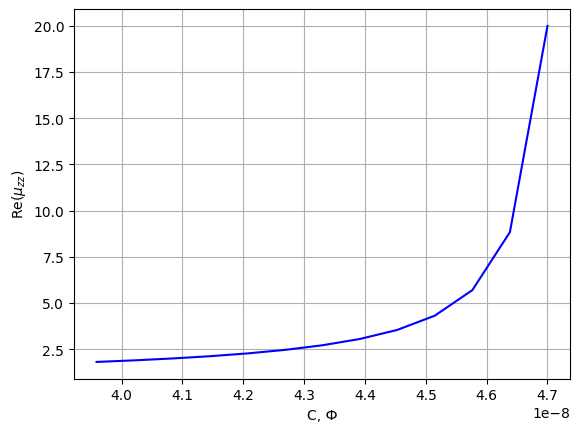

In [29]:
R, L, C, r, m, S, n, x, y = symbols('R, L, C, r, m, S, n, x, y', real = True)

A = L/(m*r) - 1/(x**2*m*r*C)
B = 1j*R/(x*m*r)

#вещественная часть магнитной проницаемости mu_zz
Re_mu_new = (A**2 + 2*S*A - (1/3)*(np.pi**2*r**3*n)*A - B**2 + S**2 - (1/3)*(np.pi**2*r**3*n)*S - (2/9)*(np.pi**2*r**3*n)**2)/((A + S + (1/3)*(np.pi**2*r**3*n))**2 - B**2)


a = (R**2*C)/(m*r)
b = a + (np.pi**2*r**3*n)/(1-y)
c = (2/3)*(np.pi**2*r**3*n) + 2*S
d = (2*L)/(m*r)
e = sqrt(b**2 - 2*a*(d + c))
g = m*r*C

omega_of_mu_1 = (sqrt(2))/(sqrt(-g*b + g*d + g*c + g*e))
omega_of_mu_2 = (sqrt(2))/(sqrt(-g*b + g*d + g*c - g*e))


index = C_list.index(C_value)
print(index)

a = slice(index-12, index+1, 1)
values_of_C = C_list[a]

print(values_of_C)
#b = values_of_C[1]
#print(b)

Mu_of_C = []
Mu_of_X = []
delta_x = []
for k in range (0, len(values_of_C)):
    #print(values_of_C[k])
    omega_subs_new = omega_of_mu_1.subs({R: Params['R'], L: Params['L'], C: values_of_C[0], r: Params['Radius'], m: Params['mu_0'], S: Params['Sigma'], n: 1/(Params['Dz'])**3})
    omega_func_new = lambdify(y, omega_subs_new, "math")
    mu_value = 20
    resonance_omega = omega_func_new(mu_value)

    element_x = ((Params['C']-values_of_C[k])/(6.174901206487431*10**-10))*Params['Dx']
    delta_x.append(element_x)

    element_Mu = Re_mu_new.subs({R: Params['R'], L: Params['L'], C: values_of_C[k], r: Params['Radius'], m: Params['mu_0'], S: Params['Sigma'], n: 1/(Params['Dz'])**3, x: resonance_omega})
    Mu_of_C.append(element_Mu)
    print(resonance_omega/2/np.pi/10**6)

print(Mu_of_C)
print(delta_x)

plt.plot(values_of_C, Mu_of_C, color = 'blue')
#plt.plot(freq, Re_mu_subs_2, color = 'red', label = 'C = 3.96 $\cdot$ 10$^{-8}$ Ф')
plt.xlabel('C, Ф')
plt.ylabel('Re($\mu_{zz}$)')
#plt.legend() 
plt.grid(True)

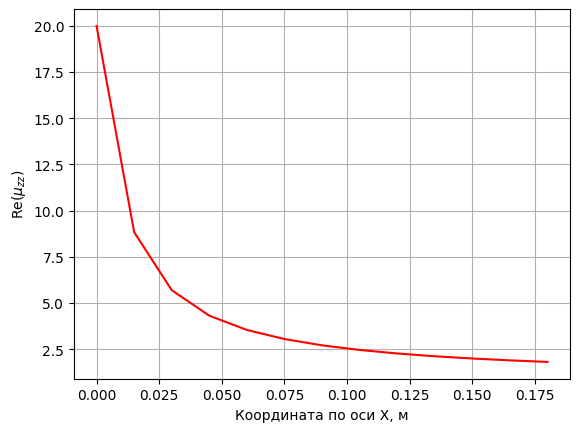

In [30]:
plt.plot(delta_x, Mu_of_C, color = 'red')
plt.xlabel('Координата по оси X, м')
plt.ylabel('Re($\mu_{zz}$)')
#ax = plt.gca()
#ax.set_xlim([0, 0.18])
#ax.set_ylim([ymin, ymax])
#plt.legend() 
plt.grid(True)

In [14]:
R, L, C, r, m, S, n, w, x = symbols('R, L, C, r, m, S, n, w, x', real = True)

Omega =  np.linspace(omega_0*0.9, omega_0*1.2, 1000)

A = L/(m*r) - 1/(w**2*m*r*C)
B = 1j*R/(w*m*r)

#вещественная часть магнитной проницаемости mu_zz
Mu = (A**2 + 2*S*A - (1/3)*(np.pi**2*r**3*n)*A - B**2 + S**2 - (1/3)*(np.pi**2*r**3*n)*S - (2/9)*(np.pi**2*r**3*n)**2)/((A + S + (1/3)*(np.pi**2*r**3*n))**2 - B**2)

Mu_subs = Mu.subs({R: Params['R'], L: Params['L'], C: Params['C'] - ((6.174901206487431*10**-10)/(Params['Dx']))*x, r: Params['Radius'], m: Params['mu_0'], S: Params['Sigma'], n: 1/(Params['Dz'])**3, w: resonance_omega})

print(Mu_subs)

(4.71011536228152*(1 - 4.82336283598067e-8/(4.7e-8 - 4.11660080432495e-8*x))**2 - 0.531450252825047 + 2.48256504588692e-8/(4.7e-8 - 4.11660080432495e-8*x))/(4.96147320207453*(1 - 4.69959442484718e-8/(4.7e-8 - 4.11660080432495e-8*x))**2 + 6.75194156820279e-5)
